# Manish Sidhenkiwar
LinkedIn: https://www.linkedin.com/in/msid02/

# KNN Project

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

**TASK: Run the cells below to load the data.**

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import dataset
df = pd.read_csv('../DATA/sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Exploration

**TASK: Create a heatmap of the correlation between the difference frequency responses.**

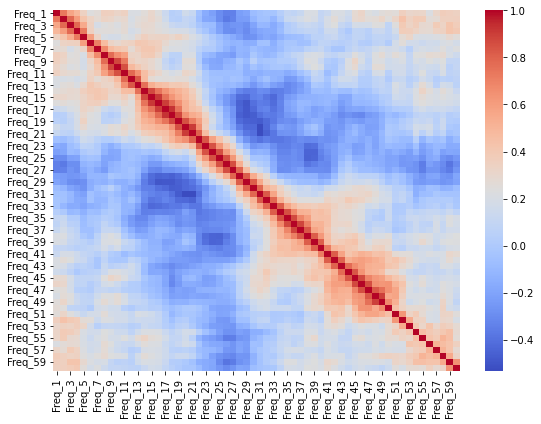

In [4]:
# CODE HERE
plt.figure(figsize=(8,6))
#sns.heatmap(data=df.drop('Label',axis=1))             Wrong,read que well.We need corr()

sns.heatmap(data=df.corr(),cmap='coolwarm')
plt.tight_layout()

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [5]:
df['Label'].unique()

array(['R', 'M'], dtype=object)

In [3]:
#CODE HERE
df['Label'].replace(['R','M'],[0,1])

In [6]:
#map method
df['Target']=df['Label'].map({'R':0,'M':1})

In [7]:
df.corr().tail()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Target
Freq_57,0.313725,0.280341,0.380819,0.340254,0.219395,0.161333,0.186324,0.267212,0.193963,0.140327,...,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219,0.000933
Freq_58,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,...,0.309673,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,0.184191
Freq_59,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,0.058273,...,0.298711,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,0.130826
Freq_60,0.347078,0.358761,0.373948,0.400626,0.253710,0.178158,0.222493,0.146216,0.095243,0.097358,...,0.195379,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,0.090055
Target,0.271694,0.231238,0.192195,0.250638,0.222232,0.132327,0.114748,0.189314,0.321448,0.341142,...,0.288651,0.141871,0.182687,0.095639,0.129341,0.000933,0.184191,0.130826,0.090055,1.000000


In [8]:
df.corr()['Target']

Freq_1     0.271694
Freq_2     0.231238
Freq_3     0.192195
Freq_4     0.250638
Freq_5     0.222232
             ...   
Freq_57    0.000933
Freq_58    0.184191
Freq_59    0.130826
Freq_60    0.090055
Target     1.000000
Name: Target, Length: 61, dtype: float64

In [9]:
df.corr()['Target'].nlargest(6)

Target     1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Target, dtype: float64

In [10]:
np.abs(df.corr()['Target'].nlargest(6)).sort_values()  #answer1

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

In [11]:
np.abs(df.corr()['Target'].sort_values()).tail(6)      #answer2 this is good.

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: The solution uses a random_state=42*

In [12]:
# CODE HERE
X=df.drop(['Label','Target'],axis=1)       # we don't need Target anymore in our ops.
y=df['Label']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [15]:
# CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import Pipeline (deploy when use will come)

In [16]:
scaler= StandardScaler()

In [17]:
knn_model= KNeighborsClassifier()

In [18]:
knn_model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [19]:
#Order of operations to perform in the pipeline
operations=[('scaler',scaler),('knn',knn_model)]

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
#estimator
pipe= Pipeline(operations)

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [22]:
# CODE HERE
from sklearn.model_selection import GridSearchCV

GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)

param_grid : dict or list of dictionaries.
    Dictionary with parameters names (`str`) as keys and lists of
    parameter settings to try as values, or a list of such
    dictionaries, in which case the grids spanned by each dictionary
    in the list are explored. This enables searching over any sequence
    of parameter settings.

In [23]:
#keys values for param_grid
k_values=list(range(1,30))

In [24]:
param_grid= {'knn__n_neighbors':k_values}  # 2spaces after knn

In [25]:
full_cv_classifier= GridSearchCV(estimator=pipe,param_grid=param_grid,cv=5,scoring='accuracy')

In [26]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [27]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [28]:
#CODE HERE
full_cv_classifier.cv_results_

{'mean_fit_time': array([0.01345663, 0.01148224, 0.00100822, 0.01584425, 0.01257267,
        0.01104178, 0.00971847, 0.003124  , 0.00507755, 0.00312405,
        0.00320001, 0.01249585, 0.01311827, 0.0093719 , 0.01170969,
        0.01249609, 0.00773582, 0.0031239 , 0.00370035, 0.0031239 ,
        0.00632405, 0.01561985, 0.00826573, 0.01058898, 0.00545712,
        0.00769038, 0.00659328, 0.01125236, 0.0034668 ]),
 'std_fit_time': array([6.32797409e-03, 6.29676603e-03, 2.01644897e-03, 4.45424067e-04,
        3.73336157e-03, 6.19722723e-03, 5.78329749e-03, 6.24799728e-03,
        6.89053304e-03, 6.24809265e-03, 3.91919155e-03, 6.24792579e-03,
        3.93067614e-03, 7.65212478e-03, 3.49420067e-03, 6.24804546e-03,
        5.07826236e-03, 6.24780655e-03, 3.62705915e-03, 6.24780655e-03,
        5.86555940e-03, 1.60716052e-06, 4.97246284e-03, 6.45707683e-03,
        4.08155594e-03, 6.98956853e-03, 5.96656709e-03, 6.11999690e-03,
        4.26683724e-03]),
 'mean_score_time': array([0.00901294, 

In [29]:
# for mean test score,
full_cv_classifier.cv_results_['mean_test_score'] #shit tab works here.

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

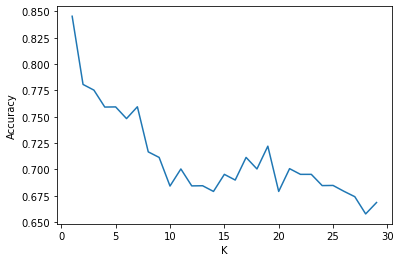

In [30]:
#plot using above mean test scores
scores=full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores)
plt.xlabel('K')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

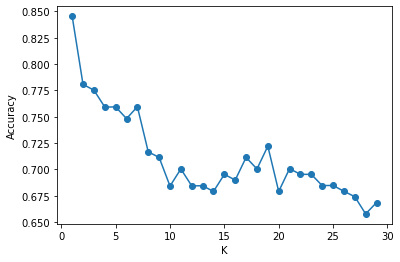

In [31]:
#plot using above mean test scores
scores=full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [32]:
#Code Here
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
full_pred = full_cv_classifier.predict(X_test)

In [34]:
classification_report(y_test,full_pred)

'              precision    recall  f1-score   support\n\n           M       0.92      0.92      0.92        13\n           R       0.88      0.88      0.88         8\n\n    accuracy                           0.90        21\n   macro avg       0.90      0.90      0.90        21\nweighted avg       0.90      0.90      0.90        21\n'

In [35]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [36]:
confusion_matrix(full_pred,y_test)

array([[12,  1],
       [ 1,  7]], dtype=int64)

-----
-----

### Thanks! Suggestions are welcome!